# PERSONALISATION: LANGUAGE & SPOTIFY
This notebook is using the class notebook Week 3.1 Spotify

In [4]:
## Install library
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 11.8 MB/s eta 0:00:00


In [63]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=7e9bf2d9263f681c0e64a54e025f0ae34cd97a0d24e6929293e802e9b615a585
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import base64

In [2]:
## Authenticate myself
SPOTIPY_CLIENT_ID='c89c705de8dc4341aa3de9ceb2bd02d2'
SPOTIPY_CLIENT_SECRET='eb98a1c7de6d4b18a882c797fcb91be7'

In [5]:
##First we authenticate
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

# GET MOST POLULAR SONGS IN DIFFERENT LANGUAGES

In [39]:
#Put in the ID of a Spotify playlist of your choosing

# Define playlist IDs in dict
playlists_global = {
    'arabic': '37i9dQZF1DXaL8gtxi9eun',
    'english': '37i9dQZF1DXclbYmv5Uve0',
    'hindi': '37i9dQZF1DX0XUfTFmNBRM',
    #'mandarin': '',
    'spanish': '1x5OgWCPDfRtsGsdbWGAYm',
    'korean': '2KBnHowBwGM16AclTpypN4'
}

In [7]:
limit = 30
trim = True

In [9]:
# create dataframe to hold all playlists
features_total_global = pd.DataFrame()

#Get playlists
for name, id in playlists_global.items():
  playlist = sp.playlist(id)
  #Extract tracks
  tracks = playlist["tracks"]["items"]
  if trim:
    tracks = tracks[-limit:]       # this shows only 10
  # Extract track IDs
    ids = [track["track"]["id"] for track in tracks]
    # Get audio features for tracks
    features_global = pd.DataFrame(sp.audio_features(ids))

    # Label dataframe rows with track name and artist
    labels = [track["track"]["artists"][0]["name"] + " - " + track["track"]["name"] for track in tracks]
    features_global.index = labels
    # Append features to the combined DataFrame
    features_total_global = features_total_global.append(features_global)

    # Print playlist name and features
    print(f"Playlist: {name}")

<ipython-input-9-6e35104f064e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_total_global = features_total_global.append(features_global)


Playlist: arabic


<ipython-input-9-6e35104f064e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_total_global = features_total_global.append(features_global)


Playlist: english


<ipython-input-9-6e35104f064e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_total_global = features_total_global.append(features_global)


Playlist: hindi


<ipython-input-9-6e35104f064e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_total_global = features_total_global.append(features_global)


Playlist: spanish
Playlist: korean


<ipython-input-9-6e35104f064e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_total_global = features_total_global.append(features_global)


In [32]:
features_total_global.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [34]:
#Drop columns that are not audio features
my_features = ['danceability', 'energy', 'key',
            'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms',
            'time_signature']
features_total_global = features_total_global[my_features]
features_total_global.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [35]:
display(features_total_global)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Wael Kfoury - Set El Kel,0.582,0.719,0,-8.665,0,0.1330,0.55600,0.000097,0.0855,0.863,184.290,198791,4
Bahaa Sultan - Cigara,0.674,0.808,5,-5.079,0,0.0443,0.23500,0.000000,0.0663,0.611,91.038,302513,4
Mohamed el Majzoub - Eftahli Albak,0.687,0.732,7,-5.760,0,0.0284,0.45700,0.000114,0.2430,0.766,107.015,193859,4
Fadel Chaker - Ya Ghayeb,0.706,0.664,0,-9.723,0,0.0285,0.35000,0.000000,0.1700,0.672,106.990,233233,4
Tamer Ashour - Hatwhashna,0.676,0.840,1,-4.857,0,0.1470,0.26500,0.000000,0.0955,0.880,171.962,200930,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BOL4 - Love story,0.865,0.822,4,-3.261,1,0.0548,0.43200,0.000000,0.0989,0.634,114.058,197333,4
Crush - Rush Hour (Feat. j-hope of BTS),0.738,0.714,0,-5.235,1,0.2490,0.15700,0.000000,0.3100,0.740,95.035,177303,4
EPEX - Sunshower,0.754,0.878,11,-1.917,0,0.0689,0.07250,0.000000,0.0849,0.902,120.009,193600,4
Han Dong Geun - dawn call from you,0.529,0.499,4,-6.370,1,0.0324,0.47600,0.000000,0.0949,0.169,135.745,237653,4


###  CREATE HEAT MAP

This part is from the class notebook too. I want to make a similar heatmap to see how correlated the different songs are, even if they are not in the same language

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

In [108]:
my_subset_features = ['danceability', 'energy', 'key',
            'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms',
            'time_signature']

 #['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [110]:
#Get subset
subset_features = features_total_global[my_subset_features]
#Standardise
scaled_features = StandardScaler().fit_transform(subset_features)
#Get cosine distances
similarities = cosine(scaled_features)
#Visualise
similarities = pd.DataFrame(similarities, columns = features_total_global.index, index = features_total_global.index)
similarities.style.background_gradient(cmap='Greens')

### RECOMMENDATION BASED ON SONGS

This is also from the class notebook. <br>
I am interested in seeing which songs get recommended on a given song. <br>
Will it show recommendations from a list that it is not from (**write a short script to print result to the screen**)

In [57]:
track = 'Bahaa Sultan - Cigara'

In [56]:
#How many tracks to recommend
n = 10
similarities.sort_values(by = track, ascending=True)[track].index[1:n+1]

Index(['Justin Bieber - Ghost', 'Manuel Turizo - Esperándote',
       'Olivia Rodrigo - good 4 u',
       'Tainy - Agua - Music From "Sponge On The Run" Movie',
       'Mau y Ricky - Desconocidos', 'NewJeans - Zero',
       'THE NEW SIX - Love or Die', 'Bad Bunny - Yonaguni',
       'Aditya A - Chaand Baaliyan', 'YUJU - Without U'],
      dtype='object')

# AUTHENTICATE FOR ANVI SEN

In [ ]:
# THIS CELL IS AUTHENTICATING FOR ANVI SEN    | DONT RUN CELL AGAIN

# Replace with your own credentials
client_id = "c89c705de8dc4341aa3de9ceb2bd02d2"
client_secret = "eb98a1c7de6d4b18a882c797fcb91be7"
redirect_uri = "https://koundinya.website/callback"

import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Initialize Spotipy with authorization
scope = "user-library-read"  # Add any other required scopes
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope))

print(sp)


In [ ]:
# DONT RUN CELL AGAIN
results = sp.current_user_playlists()
items = results['items']
results
#results['items']


{'href': 'https://api.spotify.com/v1/users/31dyivx4istbhcygumdaw23d5rdu/playlists?offset=0&limit=50',
 'items': [{'collaborative': False,
   'description': 'this is based on the daily global top 50',
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/582OGiDe8HYkWD4CiWezl1'},
   'href': 'https://api.spotify.com/v1/playlists/582OGiDe8HYkWD4CiWezl1',
   'id': '582OGiDe8HYkWD4CiWezl1',
   'images': [{'height': 640,
     'url': 'https://mosaic.scdn.co/640/ab67616d0000b27315583045b2fdb7d7bab10e81ab67616d0000b273a04be3ad7c8c67f4109111a9ab67616d0000b273ab5c9cd818ad6ed3e9b79cd1ab67616d0000b273dfddf1cb31b85a6d28b7d91f',
     'width': 640},
    {'height': 300,
     'url': 'https://mosaic.scdn.co/300/ab67616d0000b27315583045b2fdb7d7bab10e81ab67616d0000b273a04be3ad7c8c67f4109111a9ab67616d0000b273ab5c9cd818ad6ed3e9b79cd1ab67616d0000b273dfddf1cb31b85a6d28b7d91f',
     'width': 300},
    {'height': 60,
     'url': 'https://mosaic.scdn.co/60/ab67616d0000b27315583045b2fdb7d7bab10e81ab67

In [ ]:
import pandas as pd
# DONT RUN CELL AGAIN
playlists = []  # hold all playlists

# Iterate over each playlist
for playlist_id in playlist_ids:
    # Get playlist details
    playlist = sp.playlist(playlist_id)
    tracks = playlist["tracks"]["items"]

    if trim:
        tracks = tracks[-limit:]  # Take only a subset of tracks if trim is True

    # Extract track information
    playlist = []      # hold each playlist
    for track in tracks:
        track_info = track["track"]
        track_data = {
            "Track Name": track_info["name"],
            "Artist": track_info["artists"][0]["name"],
            "Album": track_info["album"]["name"],
            "Duration (ms)": track_info["duration_ms"],
            "Popularity": track_info["popularity"]
        }
        playlist_info.append(track_data)

    # Append playlist information to the main list
    playlist_data.extend(playlist_info)

# Create a DataFrame from the playlist data
anvi_sen = pd.DataFrame(playlist_data)


In [ ]:
# look at the data
anvi_sen

,Track Name,Artist,Album,Duration (ms),Popularity
0,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,HEROES & VILLAINS,221520,96
1,I Wanna Be Yours,Arctic Monkeys,AM,183956,94
2,Los del Espacio,LIT killah,Los del Espacio,338000,89
3,See You Again (feat. Kali Uchis),"Tyler, The Creator",Flower Boy,180386,95
4,Annihilate (Spider-Man: Across the Spider-Vers...,Metro Boomin,METRO BOOMIN PRESENTS SPIDER-MAN: ACROSS THE S...,231746,89
...,...,...,...,...,...
4675,Uptown Funk (feat. Bruno Mars),Mark Ronson,Uptown Special,269666,85
4676,Shape of You,Ed Sheeran,÷ (Deluxe),233712,89
4677,Adore You,Harry Styles,Fine Line,207133,87
4678,Unforgettable,French Montana,Jungle Rules,233901,86


In [ ]:
# back up in csv
# DONT RUN CELL AGAIN
anvi_sen.to_csv('anvi_sen.csv', encoding='utf-8')

In [94]:
# load data in in csv -> this is done everytime the kernel dies
anvi_sen = pd.read_csv('anvi_sen.csv')

In [95]:
anvi_sen

,Unnamed: 0,Track Name,Artist,Album,Duration (ms),Popularity;
0,918,Mal Hbibi,Saad Lamjarred,Wala Alik,195422.0,59;
1,919,Chammak Challo,Akon,Ra-One,227091.0,75;
2,920,Lamaallem,Saad Lamjarred,Lamaallem,237714.0,60;
3,921,Boushret Kheir,Hussain Aljassmi,Masri,228076.0,61;
4,922,Ghazali,Saad Lamjarred,Ghazali,214253.0,51;
...,...,...,...,...,...,...
101,101,Losing My Religion,R.E.M.,Out Of Time (25th Anniversary Edition),268426.0,86;
102,102,Ep 619: The allegations against Crispin Odey,Sensemaker,Sensemaker,502987.0,0;
103,103,CUFF IT,Beyoncé,RENAISSANCE,225388.0,90;
104,104,Heather,Conan Gray,Kid Krow,198040.0,88;


The csv files doesn't contain playlist id or how many songs there is in each, but because I have access to it via the webplayer, I can just count and split the data accordingly.

In [96]:
# each playlist is 35 tracks
length = 35

# split the dataframe into seperate ones
anvi_sen_dailydrive3 = anvi_sen.iloc[:length]  # First dataframe with the first 35 rows
anvi_sen_dailydrive2 = anvi_sen.iloc[length:length*2]  # Second dataframe with rows 36 to 70
anvi_sen_dailydrive1 = anvi_sen.iloc[length*2:length*3]

In [97]:
# drop rows with missing values
anvi_sen_dailydrive1 = anvi_sen_dailydrive1.dropna(subset=['Track Name'])
anvi_sen_dailydrive2 = anvi_sen_dailydrive2.dropna(subset=['Track Name'])
anvi_sen_dailydrive3 = anvi_sen_dailydrive3.dropna(subset=['Track Name'])


# convert to string
anvi_sen_dailydrive1['Track Name'] = anvi_sen_dailydrive1['Track Name'].astype(str)
anvi_sen_dailydrive2['Track Name'] = anvi_sen_dailydrive2['Track Name'].astype(str)
anvi_sen_dailydrive3['Track Name'] = anvi_sen_dailydrive3['Track Name'].astype(str)

<ipython-input-97-12fed8d37701>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anvi_sen_dailydrive1['Track Name'] = anvi_sen_dailydrive1['Track Name'].astype(str)
<ipython-input-97-12fed8d37701>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anvi_sen_dailydrive2['Track Name'] = anvi_sen_dailydrive2['Track Name'].astype(str)
<ipython-input-97-12fed8d37701>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

## LANGUAGES RECOMMENDED

In [98]:
import pandas as pd
from langdetect import detect

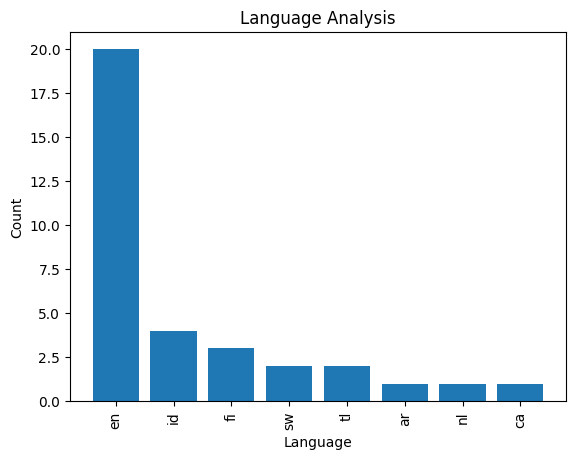

In [99]:
# languages recommended for first daily drive
anvi_sen_dailydrive1['Language'] = anvi_sen_dailydrive1['Track Name'].apply(lambda x: detect(x))

# Language Analysis
language_counts = anvi_sen_dailydrive1['Language'].value_counts()

# Plotting language distribution
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Analysis')
plt.xticks(rotation='vertical')
plt.show()

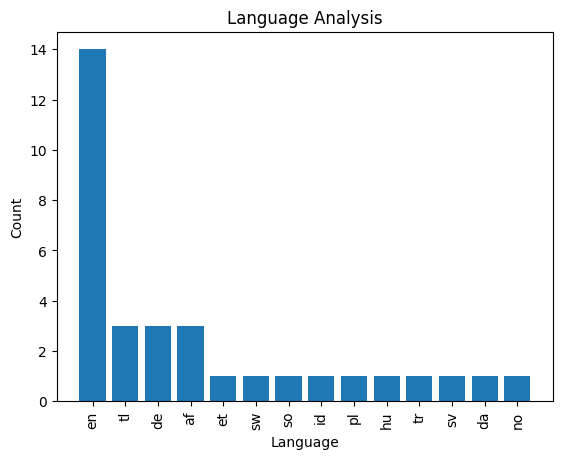

In [101]:
# languages recommended for third daily drive
anvi_sen_dailydrive2['Language'] = anvi_sen_dailydrive2['Track Name'].apply(lambda x: detect(x))

# Language Analysis
language_counts = anvi_sen_dailydrive3['Language'].value_counts()

# Plotting language distribution
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Analysis')
plt.xticks(rotation='vertical')
plt.show()

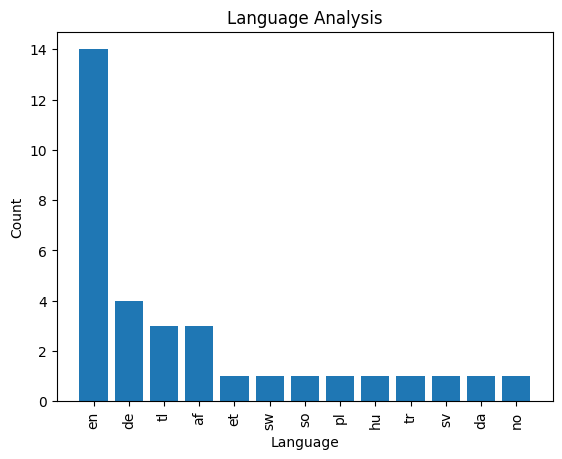

In [102]:
# languages recommended for fifth daily drive
anvi_sen_dailydrive3['Language'] = anvi_sen_dailydrive3['Track Name'].apply(lambda x: detect(x))

# Language Analysis
language_counts = anvi_sen_dailydrive3['Language'].value_counts()

# Plotting language distribution
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Analysis')
plt.xticks(rotation='vertical')
plt.show()

In [104]:
# TOTAL LANGUAGES IN ALL RECOMMENDATIONS

# drop missing
anvi_sen = anvi_sen.dropna(subset=['Track Name'])
anvi_sen['Track Name'] = anvi_sen['Track Name'].astype(str)

# Add a new column for language detection
anvi_sen['Language'] = anvi_sen['Track Name'].apply(lambda x: detect(x))

# Language Analysis
language_counts = anvi_sen['Language'].value_counts()


<ipython-input-104-236fc890872f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anvi_sen['Track Name'] = anvi_sen['Track Name'].astype(str)
<ipython-input-104-236fc890872f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anvi_sen['Language'] = anvi_sen['Track Name'].apply(lambda x: detect(x))


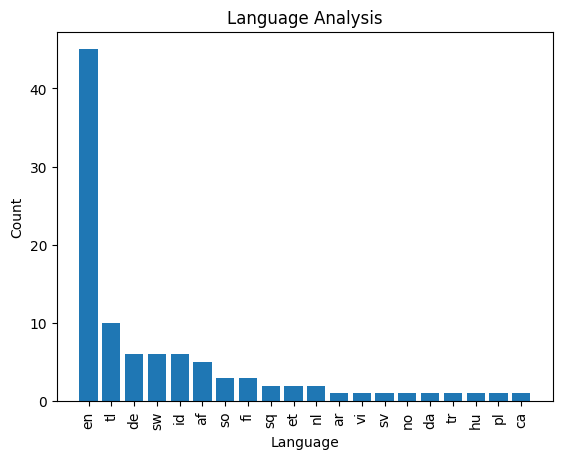

In [105]:
# Plotting language distribution
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Analysis')
plt.xticks(rotation='vertical')
plt.show()


# AUTHENTICATE FOR METTE HANSEN

In [26]:
# THIS CELL IS AUTHENTICATING FOR ANVI SEN

# Replace with your own credentials
client_id = "d1e3bd18bc68409880bc13ccd3d54f30"
client_secret = "44bef56d00ce41efb87fefe633351f6d"
redirect_uri = "https://koundinya.website/callback"

import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Initialize Spotipy with authorization
scope = "user-library-read"  # Add any other required scopes
sp_mette = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope))

print(sp_mette)


In [ ]:
import pandas as pd

playlists = []  # hold all playlists

# Iterate over each playlist
for playlist_id in playlist_ids:
    # Get playlist details
    playlist = sp.playlist(playlist_id)
    tracks = playlist["tracks"]["items"]

    if trim:
        tracks = tracks[-limit:]  # Take only a subset of tracks if trim is True

    # Extract track information
    playlist = []      # hold each playlist
    for track in tracks:
        track_info = track["track"]
        track_data = {
            "Track Name": track_info["name"],
            "Artist": track_info["artists"][0]["name"],
            "Album": track_info["album"]["name"],
            "Duration (ms)": track_info["duration_ms"],
            "Popularity": track_info["popularity"]
        }
        playlist_info.append(track_data)

    # Append playlist information to the main list
    playlist_data.extend(playlist_info)

# Create a DataFrame from the playlist data
mette_hansen = pd.DataFrame(playlist_data)


In [ ]:
mette_hansen

,Track Name,Artist,Album,Duration (ms),Popularity
0,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,HEROES & VILLAINS,221520,96
1,I Wanna Be Yours,Arctic Monkeys,AM,183956,94
2,Los del Espacio,LIT killah,Los del Espacio,338000,89
3,See You Again (feat. Kali Uchis),"Tyler, The Creator",Flower Boy,180386,95
4,Annihilate (Spider-Man: Across the Spider-Vers...,Metro Boomin,METRO BOOMIN PRESENTS SPIDER-MAN: ACROSS THE S...,231746,89
...,...,...,...,...,...
7015,Uptown Funk (feat. Bruno Mars),Mark Ronson,Uptown Special,269666,85
7016,Shape of You,Ed Sheeran,÷ (Deluxe),233712,89
7017,Adore You,Harry Styles,Fine Line,207133,87
7018,Unforgettable,French Montana,Jungle Rules,233901,86


In [ ]:
# save to csv
mette_hansen.to_csv('mette_hansen.csv', encoding='utf-8')

In [117]:
# load in data -> done everytime the kernel dies
mette_hansen = pd.read_csv('mette_hansen.csv')

In [118]:
# each playlist is 35 tracks
length = 35

# split the dataframe into seperate ones
mette_hansen_dailydrive3 = mette_hansen.iloc[:length]  # First dataframe with the first 35 rows
mette_hansen_dailydrive2 = mette_hansen.iloc[length:length*2]  # Second dataframe with rows 36 to 70
mette_hansen_dailydrive1 = mette_hansen.iloc[length*2:length*3]

In [119]:
# drop rows with missing values
mette_hansen_dailydrive1 = mette_hansen_dailydrive1.dropna(subset=['Track Name'])
mette_hansen_dailydrive2 = mette_hansen_dailydrive2.dropna(subset=['Track Name'])
mette_hansen_dailydrive3 = mette_hansen_dailydrive3.dropna(subset=['Track Name'])

# convert to string
mette_hansen_dailydrive1['Track Name'] = mette_hansen_dailydrive1['Track Name'].astype(str)
mette_hansen_dailydrive2['Track Name'] = mette_hansen_dailydrive2['Track Name'].astype(str)
mette_hansen_dailydrive3['Track Name'] = mette_hansen_dailydrive3['Track Name'].astype(str)

<ipython-input-119-c14cdfaaf487>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mette_hansen_dailydrive2['Track Name'] = mette_hansen_dailydrive2['Track Name'].astype(str)
<ipython-input-119-c14cdfaaf487>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mette_hansen_dailydrive3['Track Name'] = mette_hansen_dailydrive3['Track Name'].astype(str)


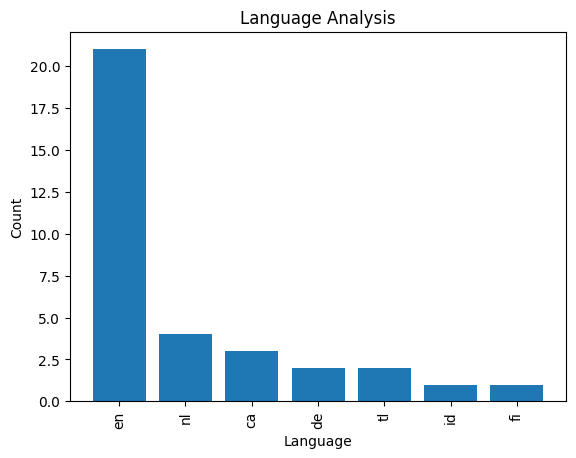

In [120]:
# languages recommended for first daily drive
mette_hansen_dailydrive1['Language'] = mette_hansen_dailydrive1['Track Name'].apply(lambda x: detect(x))

# Language Analysis
language_counts = mette_hansen_dailydrive1['Language'].value_counts()

# Plotting language distribution
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Analysis')
plt.xticks(rotation='vertical')
plt.show()

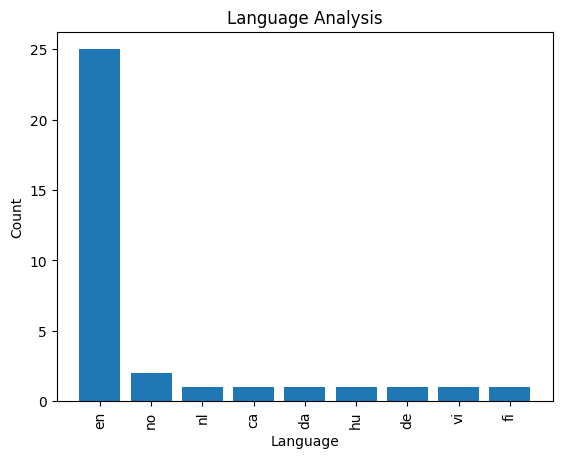

In [121]:
# languages recommended for third daily drive
mette_hansen_dailydrive2['Language'] = mette_hansen_dailydrive2['Track Name'].apply(lambda x: detect(x))

# Language Analysis
language_counts = mette_hansen_dailydrive2['Language'].value_counts()

# Plotting language distribution
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Analysis')
plt.xticks(rotation='vertical')
plt.show()

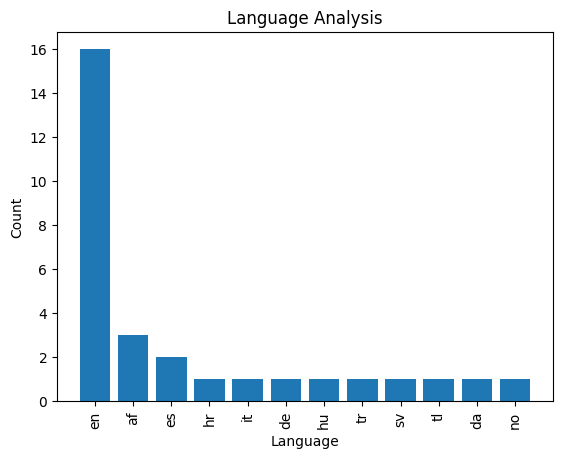

In [122]:
# languages recommended for first daily drive
mette_hansen_dailydrive3['Language'] = mette_hansen_dailydrive3['Track Name'].apply(lambda x: detect(x))

# Language Analysis
language_counts = mette_hansen_dailydrive3['Language'].value_counts()

# Plotting language distribution
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Analysis')
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-124-0e9f2c911124>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mette_hansen['Track Name'] = mette_hansen['Track Name'].astype(str)


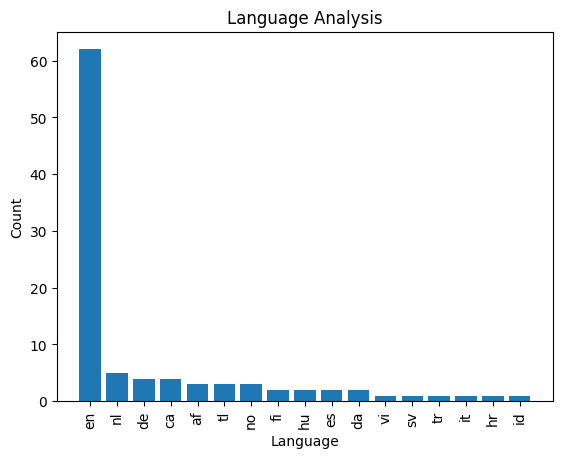

In [124]:
# total distriution of languages

mette_hansen = mette_hansen.dropna(subset=['Track Name'])

# convert to string
mette_hansen['Track Name'] = mette_hansen['Track Name'].astype(str)

mette_hansen['Language'] = mette_hansen['Track Name'].apply(lambda x: detect(x))

# Language Analysis
language_counts = mette_hansen['Language'].value_counts()

# Plotting language distribution
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Analysis')
plt.xticks(rotation='vertical')
plt.show()